## Authors and their Publishing details from Google Scholar

In [1]:
from __future__ import division
from __future__ import print_function
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline
import os
os.getcwd()
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")

import random
from PIL import Image
from os import path
from nltk.corpus import stopwords
from scipy.misc import imread
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from wordcloud import WordCloud, STOPWORDS

import mysql.connector
from mysql.connector import errorcode
from mysql.connector import Error

#sns.set_context("poster")

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Sat May 21 11:46:30 2016

@author: Raunak Mundada
"""
import scholarly_edit
import mysql_setup

def extractAuthorProfiles(author_list):
    #Author_Detail = {}
    
    
    for i in author_list:
        Author_Detail = []
        Pub_Detail = []
        apub_detail = []
        temp = 'NULL'
        print (i)
        a_obj = next(scholarly_edit.search_author(i)).fill()
        #print (a_obj)
        '''

        if hasattr(a_obj,'email') == False:
            setattr(a_obj,'email') = temp
        if hasattr(a_obj,'citedby') == False:
            setattr(a_obj,'citedby') = temp
        if hasattr(a_obj,'affiliation') == False:
            setattr(a_obj,'affiliation') = temp
        '''
        '''
        Author_Detail.append([str(a_obj.id),str(a_obj.name),str(a_obj.affiliation), str(a_obj.email),
                              str(",".join(a_obj.interests)),a_obj.citedby,a_obj.hIndex,a_obj.i_10_index,a_obj.hIndex_recent,
                              a_obj.i_10_index_recent])
        '''
        Author_Detail.append([(a_obj.id),(a_obj.name),(a_obj.affiliation), (a_obj.email),
                              str(",".join(a_obj.interests)),a_obj.citedby,a_obj.hIndex,a_obj.i_10_index,a_obj.hIndex_recent,
                              a_obj.i_10_index_recent])
        
        print ("Add Author Details to SQL")
        mysql_setup.updateAuthor(Author_Detail)      
        apub_detail = extractPublish(a_obj)
        #apub_detail.extend([a_obj.id,a_obj.name])
        Pub_Detail.append(apub_detail)
        print ("Add Publishing Details to SQL")
        mysql_setup.updatePublish(Pub_Detail)
        
        
    return Author_Detail,Pub_Detail
    
def extractPublish(a_obj):
    Pub_list = []
    journal_list = []
    # Assign NA to non-existent columns
    
    for i in a_obj.publications:
        # Assign NA to non-existent columns
        pub = i.fill()
        temp = 'NULL'
        if pub.bib.has_key("volume") == False:
            pub.bib['volume'] = temp
        if pub.bib.has_key("publisher") == False:
            pub.bib['publisher'] = temp
        if pub.bib.has_key("author") == False:
            pub.bib['author'] = temp
        if pub.bib.has_key("url") == False:
            pub.bib['url'] = temp
        if pub.bib.has_key("journal") == False:
            pub.bib['journal'] = temp
            
        if pub.bib.has_key("abstract") == True:
            if not isinstance(pub.bib['abstract'],unicode):
                #print type(pub.bib['abstract'])
                pub.bib['abstract2'] = pub.bib['abstract'].text
            elif isinstance(pub.bib['abstract'],unicode):
                pub.bib['abstract2'] = pub.bib['abstract']
        else:
            pub.bib['abstract2'] = temp
            
            
        if pub.bib.has_key("title") == False:
            pub.bib['title'] = temp
        if pub.bib.has_key("year") == False:
            pub.bib['year'] = -99
        if hasattr(pub,'citedby') == False:
            setattr(pub,'citedby',-99)
        '''
        if pub.bib.has_key['journal'] == True:
          journalTitle = pub.bib['journal']
          search_query = scholarly_edit.search_journal(journalTitle)
          journal_item = next(search_query)
          journal_list.append([journal_item.pub['journal_id'],journal_item.pub['title'],journal_item.pub['h5_index'],
            journal_item.pub['h5_median'],journal_item.pub['url']])
        '''
        Pub_list.append([pub.id_citations,pub.bib['title'], pub.bib['author'],
                       pub.bib['publisher'],pub.bib['journal'],pub.bib['abstract2'], pub.bib['volume'], pub.bib['year'], 
                        pub.citedby ,pub.bib['url'],pub.id_citations.partition(':')[0]])
    return Pub_list

if __name__ == '__main__':
    mysql_setup.mysqlConn()
    author_list = ['laurent salmon']
    scrape_Data = extractAuthorProfiles(author_list)
    
'''
author_list = ['Alex Leff','Lars Kasper','Florent Haiss','Cheng Soon Ong','Patrick E Brown',
                  'Geoffrey Hinton','Michael I. Jordan','Jonathan Hays','Daphne Koller','Sayan Mukherjee',
                  'Michael Collins','Monnie McGee','Tony Ng','Michael Hahsler','Kalyanmoy Deb','David Lopez Mateos',
                  'vapnik','Corinna Cortes','Jason Weston','Yann LeCun']
'''

Creating table Author: already exists.
Creating table Publishing_Detail: already exists.
laurent salmon


ConnectionError: HTTPSConnectionPool(host='scholar.google.com', port=443): Max retries exceeded with url: /citations?view_op=search_authors&hl=en&mauthors=laurent%20salmon (Caused by NewConnectionError('<requests.packages.urllib3.connection.VerifiedHTTPSConnection object at 0x000000000CD43160>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [2]:
import mysql_setup
query_list,field_names = mysql_setup.query_with_fetchmany("SELECT * FROM Author")
Author = mysql_setup.make_frame(query_list,field_names)
Author.head()

In [3]:
query_list,field_names = mysql_setup.query_with_fetchmany("SELECT * FROM Publishing_Detail")
Publishing_Detail = mysql_setup.make_frame(query_list,field_names)
Publishing_Detail.head()

In [6]:
query_list,field_names = mysql_setup.query_with_fetchmany("SELECT Pub_Journal FROM Publishing_Detail")
Pub_Journal = mysql_setup.make_frame(query_list,field_names)
Pub_Journal.head()

In [9]:
len(Pub_Journal.Pub_Journal.unique())

1825

In [11]:
import scholarly_edit
x = scholarly_edit.search_journal('Blood')

ConnectionError: HTTPSConnectionPool(host='scholar.google.comcitations', port=443): Max retries exceeded with url: /?hl=en&view_op=search_venues&vq=Blood (Caused by NewConnectionError('<requests.packages.urllib3.connection.VerifiedHTTPSConnection object at 0x000000000D32A828>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

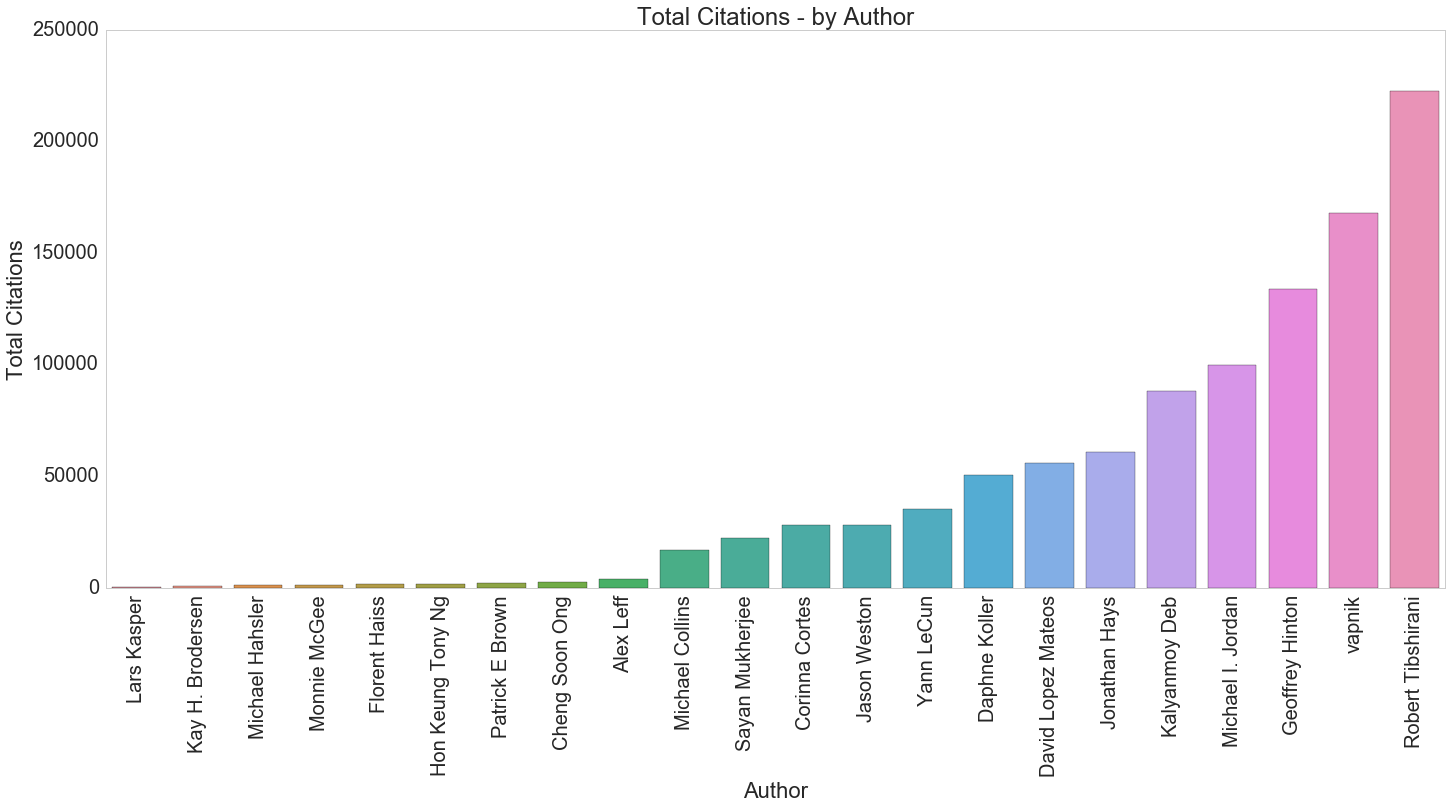

In [14]:
sns.set(font_scale = 2)
sns.set_context({"figure.figsize": (24, 10)})
sns.set_style("whitegrid")
Author = Author.sort_values('Author_Cited_By')
labels = Author.Author_Name
g = sns.barplot(x = Author.Author_Name, y = Author.Author_Cited_By, data = Author)
g.set_xticklabels(labels,rotation = 90)
plt.title("Total Citations - by Author")
plt.xlabel('Author')
plt.ylabel('Total Citations')
g.axes.grid('off')
#sns.set(font_scale=15)

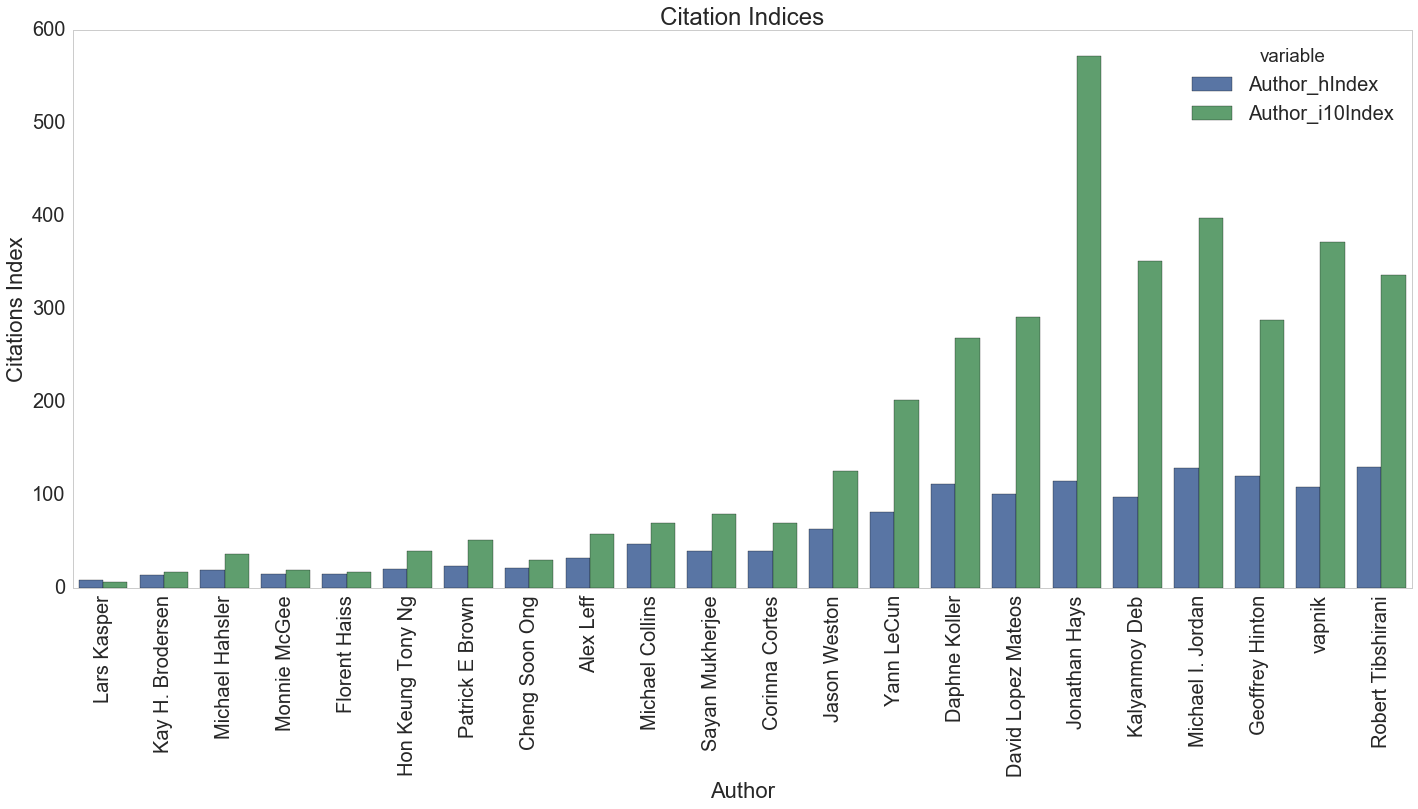

In [15]:
df = pd.melt(Author,id_vars = ['Author_Name'],value_vars = ['Author_hIndex','Author_i10Index'])
labels = df.Author_Name
sns.set_context({"figure.figsize": (24, 10)})
sns.set_style("whitegrid")
g = sns.barplot(x = 'Author_Name',y='value',hue = 'variable',data = df)
g.set_xticklabels(labels,rotation = 90)
plt.title("Citation Indices")
plt.xlabel('Author')
plt.ylabel('Citations Index')
g.axes.grid('off')
#sns.set(font_scale=2)

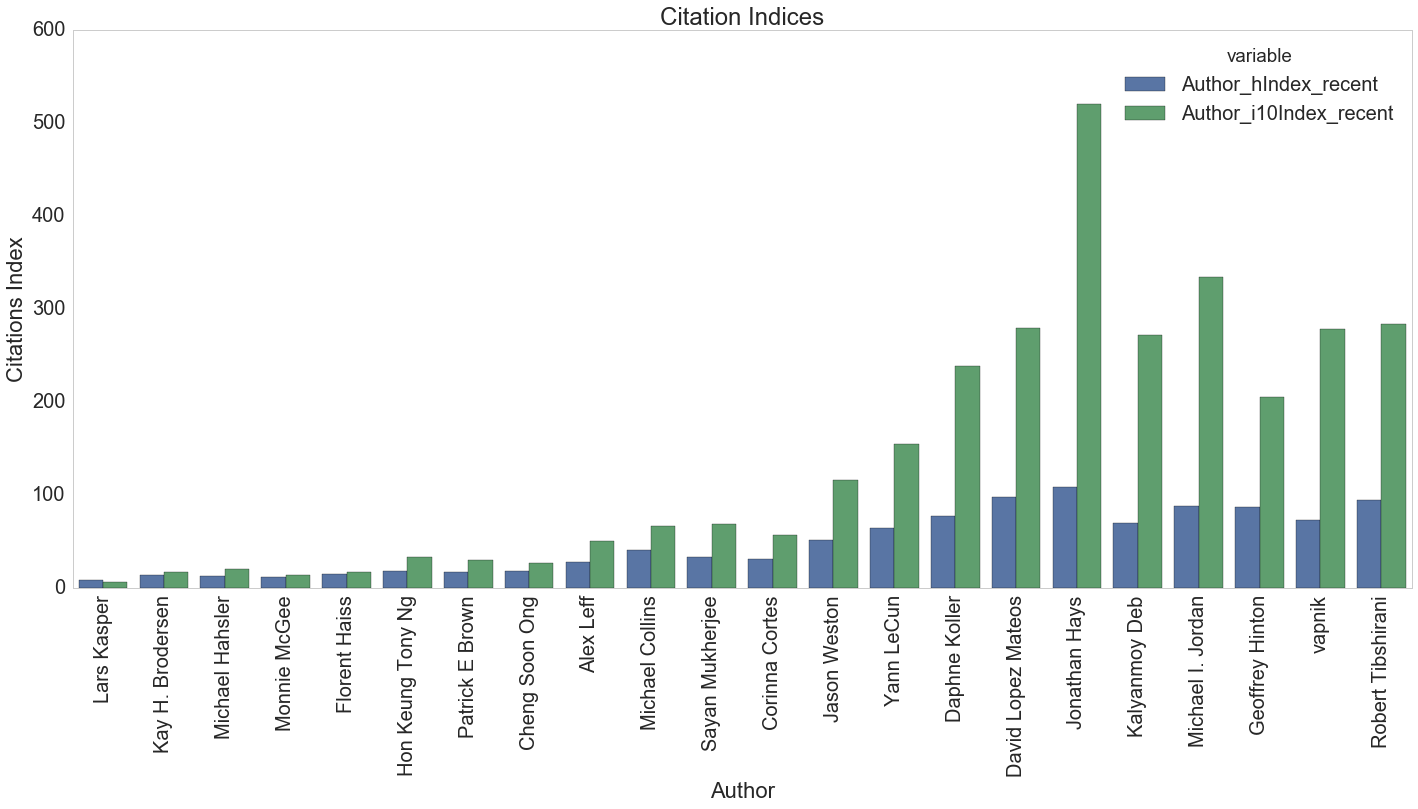

In [16]:
df = pd.melt(Author,id_vars = ['Author_Name'],value_vars = ['Author_hIndex_recent','Author_i10Index_recent'])
labels = df.Author_Name
sns.set_context({"figure.figsize": (24, 10)})
sns.set_style("whitegrid")
g = sns.barplot(x = 'Author_Name',y='value',hue = 'variable',data = df)
g.set_xticklabels(labels,rotation = 90)
plt.title("Citation Indices")
plt.xlabel('Author')
plt.ylabel('Citations Index')
g.axes.grid('off')
#sns.set(font_scale=2)

In [17]:
type(Author.Author_Interests[0])

unicode

In [18]:
Author['Author_Interests'] = Author['Author_Interests'].astype('str')

Select authors based on their interest area

In [19]:
keyword = 'machine learning'
df_ml = pd.DataFrame()
for index,row in Author.iterrows():
    a_interests  = (row['Author_Interests'])
    if keyword in a_interests.lower():
        df_ml =  df_ml.append(row,ignore_index=True)

Authors with machine learning as one of their interest areas

In [20]:
df_ml

,Author_Affiliation,Author_Cited_By,Author_Email,Author_Id,Author_Interests,Author_Name,Author_hIndex,Author_hIndex_recent,Author_i10Index,Author_i10Index_recent
0,"Google, Inc. / ETH Zurich",837.0,@inf.ethz.ch,6yx_xmcAAAAJ,"Bayesian inference,Machine learning,Computatio...",Kay H. Brodersen,14.0,14.0,17.0,17.0
1,"Data61, Canberra",2539.0,@anu.edu.au,ofMZr0IAAAAJ,"Machine Learning,Bioinformatics,Computational ...",Cheng Soon Ong,21.0,18.0,30.0,26.0
2,"Professor of Computer Science, Columbia Univer...",17039.0,@cs.columbia.edu,DxoenfgAAAAJ,"Computational Linguistics,Natural Language Pro...",Michael Collins,47.0,40.0,70.0,66.0
3,"Duke University, MIT",22477.0,@stat.duke.edu,R94cBVgAAAAJ,"machine learning,computational biology,stochas...",Sayan Mukherjee,39.0,33.0,79.0,68.0
4,"Google Research, NY",28008.0,@google.com,U_IVY50AAAAJ,"Machine Learning,Datamining",Corinna Cortes,39.0,31.0,70.0,57.0
5,Facebook,28073.0,@fb.com,lMkTx0EAAAAJ,"Artificial Intelligence,Machine Learning,Bioin...",Jason Weston,63.0,51.0,125.0,116.0
6,Director of AI Research at Facebook & Silver P...,35315.0,@cs.nyu.edu,WLN3QrAAAAAJ,"AI,machine learning,computer vision,robotics,i...",Yann LeCun,81.0,64.0,202.0,155.0
7,"Professor of Computer Science, Stanford Univer...",50410.0,@cs.stanford.edu,5Iqe53IAAAAJ,"machine learning,computational biology,compute...",Daphne Koller,112.0,77.0,269.0,238.0
8,"Research Associate, Harvard University",56022.0,@physics.harvard.edu,P6krKIkAAAAJ,"Data science,high energy physics,machine learning",David Lopez Mateos,101.0,97.0,291.0,279.0
9,Queen Mary University of London,60944.0,@qmul.ac.uk,1DS8DjgAAAAJ,"Particle Physics,Higgs bosons,Machine learning...",Jonathan Hays,115.0,108.0,572.0,520.0


In [21]:
df_ml['Author_Interests'] = df_ml['Author_Interests'].astype(str)
a_interests = df_ml['Author_Interests'].tolist()
type(a_interests)
a_interests = " ".join(str(i) for i in a_interests if not i.isdigit() and  len(i)>3)
a_interests

'Bayesian inference,Machine learning,Computational modelling,Neuroimaging,Dynamic causal modelling Machine Learning,Bioinformatics,Computational Biology Computational Linguistics,Natural Language Processing,Machine Learning,Artificial Intelligence machine learning,computational biology,stochastic topology,stochastic geometry Machine Learning,Datamining Artificial Intelligence,Machine Learning,Bioinformatics,Vision,Natural Language Processing AI,machine learning,computer vision,robotics,image compression machine learning,computational biology,computer vision,artificial intelligence Data science,high energy physics,machine learning Particle Physics,Higgs bosons,Machine learning,Big data,Proteomics Optimization,Evolutionary Computation,Multi-objective optimization,Optimal design,Machine Learning machine learning,statistics,computational biology,artificial intelligence,optimization machine learning,neural networks,artificial intelligence,cognitive science,computer science machine learning,

In [22]:
limit = 1000
infosize = 12

title = 'Most frequent words Job Title'
chartinfo = 'SF Salaries Job Titles'
footer = 'The {} most frequent words, excluding English stopwords.\n{}'.format(limit, chartinfo)
#font = '/usr/share/fonts/truetype/ubuntu-font-family/Ubuntu-B.ttf'
fontcolor='#fafafa'
bgcolor = '#000000'
english_stopwords = set(stopwords.words('english')) | STOPWORDS | ENGLISH_STOP_WORDS

In [23]:
d = os.getcwd()
ml_mask = np.array(Image.open(path.join(d, "machine-learning-head-964x670-482x335.jpg")))
wordcloud = WordCloud(
    max_words=limit,
    stopwords=english_stopwords,
    mask = ml_mask,
    background_color = "white",
).generate(a_interests)


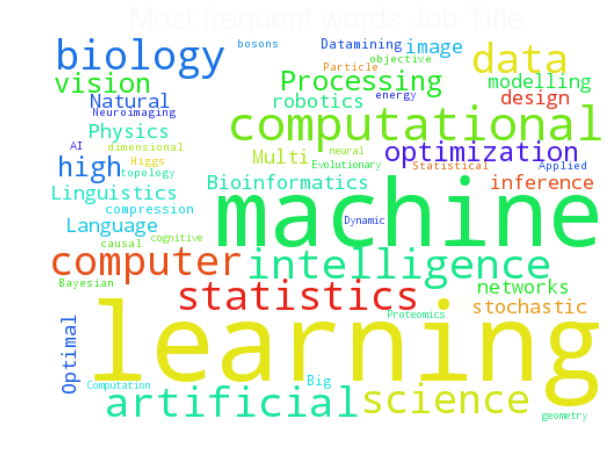

In [24]:
def grey_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(50, 100)

fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(14)

plt.imshow(wordcloud.recolor(random_state=3))
plt.title(title, color=fontcolor, size=30, y=1.01)
plt.axis('off')
plt.show()


In [25]:
a_id = df_ml.Author_Id.tolist()

In [26]:
DB_NAME = 'NLP_Project'
in_p=', '.join(list(map(lambda x: '%s', a_id)))
sql = ("SELECT * FROM publishing_Detail WHERE Author_Id in (%s)")
sql = sql % in_p
query_list = list()
cnx = mysql.connector.connect(user='root',password = "raunak")
cursor = cnx.cursor()
cnx.database = DB_NAME
cursor.execute(sql,a_id)
for row in iter(cursor):
        query_list.append(row)
        num_fields = len(cursor.description)
        field_names = [i[0] for i in cursor.description]
        field_names
cursor.close()
cnx.close()

Publication details of authors with machine learning as their interest area

In [27]:
ml_Detail = mysql_setup.make_frame(query_list,field_names)

In [28]:
len(ml_Detail.Author_Id.unique())

15

In [29]:
len(a_id)

15

In [30]:
ml_Detail.shape

(7009, 11)

In [31]:
ml_Detail = ml_Detail[ml_Detail.Pub_Journal != "NULL"]
ml_Detail.Pub_Journal = ml_Detail.Pub_Journal.astype('category')